# Ridge regression and Lasso regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model as sk_lm
from sklearn import model_selection as sk_msel
from sklearn import metrics as sk_metrics
from sklearn import preprocessing as sk_pre
import statsmodels.api as sm

In [208]:
df_hit=pd.read_csv('data/Hitters.csv')

In [209]:
df_hit.drop(columns='Unnamed: 0', inplace=True)
df_hit.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [210]:
df_hit=pd.get_dummies(df_hit, columns=['Division', 'League', 'NewLeague'])
df_hit.drop(columns=['Division_E', 'League_A', 'NewLeague_A'], inplace=True)
df_hit.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,Division_W,League_N,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,1,0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,0,1,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,0,1,1


In [211]:
df_hit.dropna(inplace=True)
df_hit.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,Division_W,League_N,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,1,0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,0,1,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,0,1,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,1,0,0


In [268]:
X=df_hit.drop(columns='Salary')
y=df_hit[['Salary']]

# Train-test split
X_train, X_test, y_train, y_test = sk_msel.train_test_split(X, y, test_size=0.5, random_state=20)

### Ridge Regression

#### Ridge regression coefficients for different shrinkage parameters

In [276]:
coefs=[]
alphas=[10**k for k in np.linspace(-2,5,100)]

for alpha in alphas:
    ridge=sk_lm.Ridge(normalize=True, alpha=alpha).fit(X,y)
    coefs.append(ridge.coef_[0])
    
df_coef=pd.DataFrame(coefs, index=alphas, columns=X.columns)
df_coef

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Division_W,League_N,NewLeague_N
0.010000,-1.583572,5.546088,0.632268,-0.280001,0.064295,5.164532,-10.359566,-0.053441,0.191628,0.677937,0.685252,0.381024,-0.594546,0.278966,2.860122e-01,-3.767494,-122.894288,61.127893,-27.641067
0.011768,-1.518434,5.312020,0.378451,-0.121874,0.138020,5.030392,-10.611920,-0.046378,0.188725,0.696344,0.638360,0.366391,-0.571048,0.278264,2.771434e-01,-3.793503,-123.256353,60.845270,-27.450913
0.013849,-1.446961,5.063608,0.128287,0.034430,0.211193,4.885682,-10.800437,-0.039692,0.185194,0.709944,0.592925,0.353115,-0.545867,0.277454,2.677464e-01,-3.816608,-123.580748,60.507954,-27.155879
0.016298,-1.369606,4.803273,-0.114980,0.186626,0.283155,4.731077,-10.916654,-0.033433,0.181050,0.719016,0.549321,0.340997,-0.519057,0.276526,2.578372e-01,-3.835497,-123.855308,60.103085,-26.738957
0.019179,-1.287030,4.533996,-0.347758,0.332418,0.353163,4.567570,-10.953412,-0.027640,0.176318,0.723960,0.507856,0.329792,-0.490709,0.275468,2.474404e-01,-3.848728,-124.067128,59.616022,-26.183117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52140.082880,0.000023,0.000084,0.000339,0.000142,0.000150,0.000177,0.000723,0.000002,0.000007,0.000055,0.000015,0.000015,0.000016,0.000009,1.516777e-06,-0.000007,-0.003325,-0.000247,-0.000049
61359.072734,0.000020,0.000071,0.000288,0.000121,0.000128,0.000150,0.000614,0.000002,0.000006,0.000047,0.000012,0.000013,0.000014,0.000008,1.288904e-06,-0.000006,-0.002826,-0.000210,-0.000042
72208.090184,0.000017,0.000061,0.000245,0.000103,0.000108,0.000128,0.000522,0.000001,0.000005,0.000040,0.000011,0.000011,0.000012,0.000007,1.095263e-06,-0.000005,-0.002401,-0.000178,-0.000035
84975.343591,0.000014,0.000052,0.000208,0.000087,0.000092,0.000108,0.000444,0.000001,0.000004,0.000034,0.000009,0.000009,0.000010,0.000006,9.307129e-07,-0.000004,-0.002040,-0.000152,-0.000030


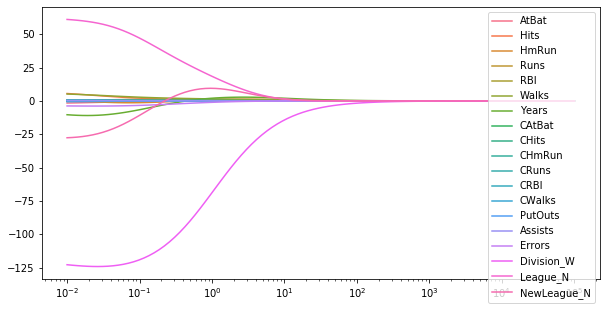

In [248]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax=sns.lineplot(data=df_coef, dashes=False)
ax.set_xscale('log')

#### Mean Squared Error for selected parameters

In [345]:
# Alpha = 2
ridge2=sk_lm.Ridge(normalize=True, alpha=2).fit(X_train,y_train)
y_pre=ridge2.predict(X_test)
sk_metrics.mean_squared_error(y_test, y_pre)

133380.39896741047

In [250]:
# Alpha = 0 -> Linear Regression
ridge0=sk_lm.Ridge(normalize=True, alpha=0).fit(X_train,y_train)
y_pre=ridge0.predict(X_test)
sk_metrics.mean_squared_error(y_test, y_pre)

151920.82478988546

In [251]:
# Alpha -> inf
ridgeInf=sk_lm.Ridge(normalize=True, alpha=10**10).fit(X_train,y_train)
y_pre=ridgeInf.predict(X_test)
sk_metrics.mean_squared_error(y_test, y_pre)

199602.0883297311

#### Optimal shrinkage parameter with cross validation

In [350]:
#alphas=[10**k for k in np.linspace(-2,5,100)]
alphas=np.linspace(0.001,2,200)
ridgeCV=sk_lm.RidgeCV(alphas=alphas, normalize=True, cv=10, scoring='neg_mean_squared_error').fit(X, y)

In [351]:
ridgeCV.alpha_

0.011045226130653268

In [357]:
alphas=np.linspace(0.001,0.1,200)
scores=[]

for a in alphas:
    ridgeModel=sk_lm.Ridge(alpha=a, normalize=True)
    score=np.mean(-sk_msel.cross_val_score(ridgeModel, X, y, cv=10, scoring='neg_mean_squared_error'))
    scores.append((a, score))

In [361]:
df_scores=pd.DataFrame(scores, columns=['alpha', 'mse'])
df_scores.head()

,alpha,mse
0,0.001000,115470.408249
1,0.001497,115193.905069
2,0.001995,114993.753923
3,0.002492,114841.623783
4,0.002990,114722.055340


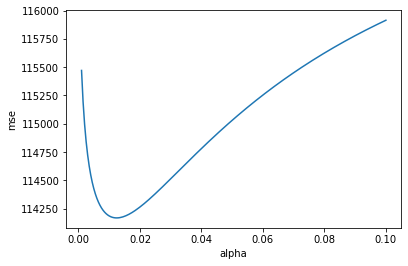

In [364]:
sns.lineplot(data=df_scores, x='alpha', y='mse')

### Lasso Regression

#### Lasso regression coefficients for different shrinkage parameters

In [448]:
lasso_coefs=[]
alphas=[k/100+0.01 for k in range(500)]

for alpha in alphas:
    lasso=sk_lm.Lasso(max_iter=10000, normalize=True, alpha=alpha).fit(X,y['Salary'])
    lasso_coefs.append(lasso.coef_)
    
df_lasso_coef=pd.DataFrame(lasso_coefs, index=alphas, columns=X.columns)
df_lasso_coef

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Division_W,League_N,NewLeague_N
0.01,-1.980122,7.374319,3.513015,-2.106468,-0.756229,6.111878,-4.120375,-0.153012,0.125045,-0.00000,1.384135,0.725579,-0.796334,0.282541,0.358152,-3.282827,-116.565321,60.176820,-22.380985
0.02,-1.982387,7.308945,2.990719,-1.944292,-0.548943,6.020469,-4.841779,-0.130740,0.064286,0.00000,1.367429,0.712268,-0.791663,0.282878,0.342925,-3.174819,-116.275574,57.205533,-19.427137
0.03,-1.985106,7.245148,2.467748,-1.782897,-0.341315,5.929716,-5.571564,-0.108268,0.002867,0.00000,1.350950,0.698901,-0.787205,0.283225,0.327640,-3.066304,-115.987036,54.226794,-16.466942
0.04,-1.957760,7.046215,2.032330,-1.521693,-0.160967,5.802970,-6.101441,-0.098309,0.000000,0.00000,1.291011,0.684841,-0.764010,0.282321,0.315720,-3.015394,-115.944878,51.742518,-14.431486
0.05,-1.940475,6.888540,1.525429,-1.255205,-0.000000,5.687769,-6.724454,-0.084566,0.000000,0.09288,1.216843,0.635811,-0.743834,0.282076,0.303317,-2.950396,-116.026094,49.327878,-12.359605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.96,0.000000,1.323464,0.000000,0.000000,0.000000,1.442340,0.000000,0.000000,0.000000,0.00000,0.143533,0.327367,0.000000,0.054871,0.000000,-0.000000,-0.000000,0.000000,0.000000
4.97,0.000000,1.321913,0.000000,0.000000,0.000000,1.440179,0.000000,0.000000,0.000000,0.00000,0.143286,0.327232,0.000000,0.054445,0.000000,-0.000000,-0.000000,0.000000,0.000000
4.98,0.000000,1.320361,0.000000,0.000000,0.000000,1.438018,0.000000,0.000000,0.000000,0.00000,0.143038,0.327098,0.000000,0.054019,0.000000,-0.000000,-0.000000,0.000000,0.000000
4.99,0.000000,1.318809,0.000000,0.000000,0.000000,1.435857,0.000000,0.000000,0.000000,0.00000,0.142791,0.326963,0.000000,0.053592,0.000000,-0.000000,-0.000000,0.000000,0.000000


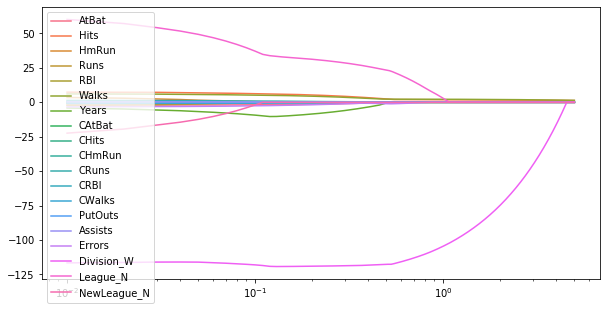

In [449]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax=sns.lineplot(data=df_lasso_coef, dashes=False)
ax.set_xscale('log')

#### Optimal shrinkage parameter with cross validation for Lasso

In [450]:
alphas=[k/100+0.01 for k in range(500)]
lassoCV=sk_lm.LassoCV(alphas=alphas, max_iter=10000, normalize=True, cv=10).fit(X, y['Salary'])

In [451]:
lassoCV.alpha_

0.17

In [454]:
scores=[]

for a in alphas:
    lassoModel=sk_lm.Lasso(alpha=a, normalize=True, max_iter=10000)
    score=np.mean(-sk_msel.cross_val_score(lassoModel, X, y, cv=10, scoring='neg_mean_squared_error'))
    scores.append((a, score))

In [455]:
df_scores=pd.DataFrame(scores, columns=['alpha', 'mse'])
df_scores.head()

,alpha,mse
0,0.00100,116516.016387
1,0.00602,116232.534446
2,0.01104,116048.896894
3,0.01606,115860.224676
4,0.02108,115661.314970


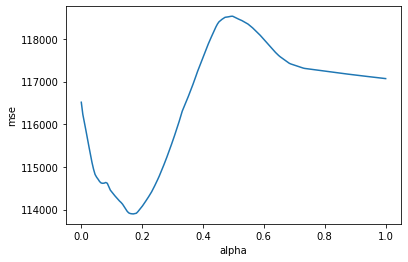

In [456]:
sns.lineplot(data=df_scores, x='alpha', y='mse')

In [463]:
# Show coefficients at optimal alpha
lasso_opt=sk_lm.Lasso(alpha=0.17, normalize=True, max_iter=10000).fit(X,y)
df_lasso_coef=pd.DataFrame(lasso_opt.coef_, index=X.columns, columns=['Coef'])
df_lasso_coef.loc[df_lasso_coef.Coef!=0]

,Coef
AtBat,-1.537306
Hits,5.645696
Walks,4.702484
Years,-9.291092
CHmRun,0.526296
CRuns,0.657813
CRBI,0.382596
CWalks,-0.523750
PutOuts,0.272234
Assists,0.169850
